In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
#load training data
train = pd.read_csv('train.csv', nrows = 100000)

# load test data
test = pd.read_csv('test.csv', nrows=100000)

# load destination data
destination = pd.read_csv('destinations.csv', nrows=100000)

## Data preprocessing##

In [3]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,5.760540,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,3.771156,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,9.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


In [5]:
train.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                         71
srch_co                         71
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hotel_cluster', ylabel='Density'>

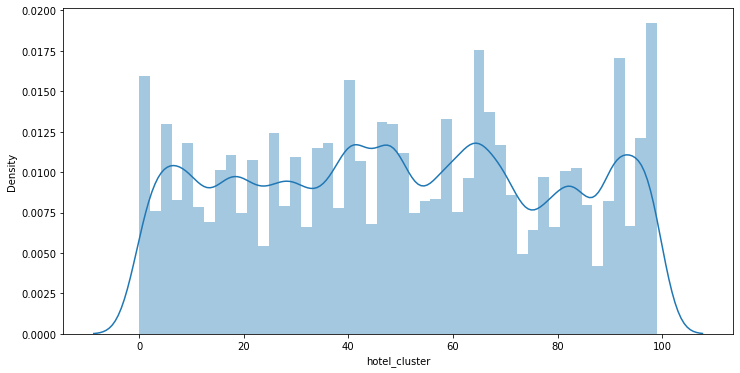

In [6]:
# hotel cluster - distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(train['hotel_cluster'])

In [7]:
# finding the hotel cluster unique
train['hotel_cluster'].nunique()

100

In [8]:
def get_year(x):
    '''
    Args:
        datetime
    Returns:
        year as numeric
    '''
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass

# get month part from a date

def get_month(x):
    '''
    Args:
        datetime
    Returns:
        month as numeric
    '''    
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass

# extract year and month from date time column
train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)

train.date_time_year = train.date_time_year.apply(lambda x: get_year(x))
train.date_time_month = train.date_time_month.apply(lambda x: get_month(x))
del train['date_time']

# extract year and month from check in date column
train['srch_ci_year'] = pd.Series(train.srch_ci, index = train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index = train.index)

train.srch_ci_year = train.srch_ci_year.apply(lambda x: get_year(x))
train.srch_ci_month = train.srch_ci_month.apply(lambda x: get_month(x))
del train['srch_ci']

# extract year and month from check out date column
train['srch_co_year'] = pd.Series(train.srch_co, index = train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index = train.index)

train.srch_co_year = train.srch_co_year.apply(lambda x: get_year(x))
train.srch_co_month = train.srch_co_month.apply(lambda x: get_month(x))
del train['srch_co']

# check the transformed data
train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,8
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,9
2,2,3,66,348,48862,2234.2641,12,0,0,9,...,2,50,628,1,2014,8,2014,8,2014,9
3,2,3,66,442,35390,913.1932,93,0,0,3,...,2,50,1457,80,2014,8,2014,11,2014,11
4,2,3,66,442,35390,913.6259,93,0,0,3,...,2,50,1457,21,2014,8,2014,11,2014,11


In [9]:
#correlation test on hotel cluster 
train.corr()["hotel_cluster"].sort_values()

srch_destination_type_id    -0.030064
is_booking                  -0.025380
user_location_country       -0.025170
hotel_country               -0.021170
site_name                   -0.019154
hotel_continent             -0.008441
srch_destination_id         -0.007258
user_location_city          -0.006580
channel                     -0.005956
srch_rm_cnt                 -0.005801
is_mobile                   -0.002803
srch_co_month               -0.000413
date_time_year               0.000696
cnt                          0.000914
date_time_month              0.001208
user_id                      0.001396
srch_ci_month                0.001682
posa_continent               0.002204
srch_children_cnt            0.005469
srch_adults_cnt              0.007322
user_location_region         0.008037
srch_ci_year                 0.010879
orig_destination_distance    0.011362
srch_co_year                 0.012014
hotel_market                 0.036107
is_package                   0.051955
hotel_cluste

In [10]:
# Nothing is highly correlated 

In [11]:
# only take users who booked
train = train.loc[train['is_booking'] == 1]
len(train)

8270

In [12]:
# import destinations dataset
destinations = pd.read_csv("destinations.csv")
destinations.head(3)

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548


In [13]:
#merge training and destinations on search destination id 
train = pd.merge(train, destinations, on='srch_destination_id')
train.shape

(8235, 176)

In [14]:
# drop NaN values
train.isnull().sum()
train.dropna(inplace = True)
train.shape

(5435, 176)

In [15]:
# view training dataset
train.head(3)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
1,13,1,46,171,15334,5655.3159,4539,0,0,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037
2,2,3,66,356,4751,762.2315,6258,0,1,9,...,-2.384553,-2.345528,-2.396591,-2.399953,-2.388116,-2.394294,-2.400667,-2.398716,-2.386585,-2.39037


## Feature Engineering##

In [16]:
# ok at this point i will do featured engineered on the dataset 
# i want to check is hotel_cluster is balanced then split data into training and validation 

In [17]:
# check if the target class ('hotel_cluster') is balanced
x = list(train['hotel_cluster'])

from collections import Counter
counts = Counter(sorted(x))
 
# show first 20    
for key in sorted(counts)[:20]:
    print (key, counts[key])

0 36
1 79
2 75
3 22
4 75
5 59
6 92
7 80
8 34
9 87
10 81
11 46
12 6
13 100
14 27
15 60
16 119
17 32
18 138
19 82


## Train/Test split##

In [18]:
# create X and Y
y = np.array(train['hotel_cluster'])
X = np.array(train.loc[:, train.columns != 'hotel_cluster'])

from sklearn.model_selection import train_test_split

# create training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [19]:
from sklearn.preprocessing import MinMaxScaler
# rescale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
# logistic regression
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 2000).fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Accuracy: ' + str(round(balanced_accuracy_score(y_test,pred), 3)))

Accuracy: 0.109


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [21]:
from sklearn.tree import DecisionTreeClassifier
# decision trees
clf = DecisionTreeClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)

print('Accuracy: ' + str(round(balanced_accuracy_score(y_test,pred), 3)))

Accuracy: 0.191


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
